In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv(r'artifacts\data\fake_and_real_news.csv')

In [3]:
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [4]:
df['Text'][0]

' Top Trump Surrogate BRUTALLY Stabs Him In The Back: ‘He’s Pathetic’ (VIDEO) It s looking as though Republican presidential candidate Donald Trump is losing support even from within his own ranks. You know things are getting bad when even your top surrogates start turning against you, which is exactly what just happened on Fox News when Newt Gingrich called Trump  pathetic. Gingrich knows that Trump needs to keep his focus on Hillary Clinton if he even remotely wants to have a chance at defeating her. However, Trump has hurt feelings because many Republicans don t support his sexual assault against women have turned against him, including House Speaker Paul Ryan (R-WI). So, that has made Trump lash out as his own party.Gingrich said on Fox News: Look, first of all, let me just say about Trump, who I admire and I ve tried to help as much as I can. There s a big Trump and a little Trump. The little Trump is frankly pathetic. I mean, he s mad over not getting a phone call? Trump s referr

In [5]:
df['Text'][9899]

" Sean Spicer HILARIOUSLY Branded As Chickensh*t After He Bolts From Briefing (TWEETS) (VIDEO) Oh, Mr. Spicey. Our favorite press secretary because we love to hate him. His gymnastics around Donald Trump s antics and gaffes (along with his own) are already the stuff of legend, and not in a good way. It makes his relationship with the press acrimonious, and he may well have just about had it with that. Today, he turned chickenshit, tucked his tail between his legs, and ran away from his own press briefing, leaving the White House Press Corps absolutely stunned.Cries of,  Sean! Hey Sean! Seeeeeean! Ah come on, Sean! He walked away!  are among just a few of the loud and disappointed protests coming from a press corps that undoubtedly had a squillion uncomfortable questions for him.Watch below:.@PressSec literally fled press questions today pic.twitter.com/S9uIapiBn4  American Bridge (@American_Bridge) May 2, 2017Near the end of the video, you can hear someone say,  Really?  Yes, really, a

In [6]:
df.isna().sum()

Text     0
label    0
dtype: int64

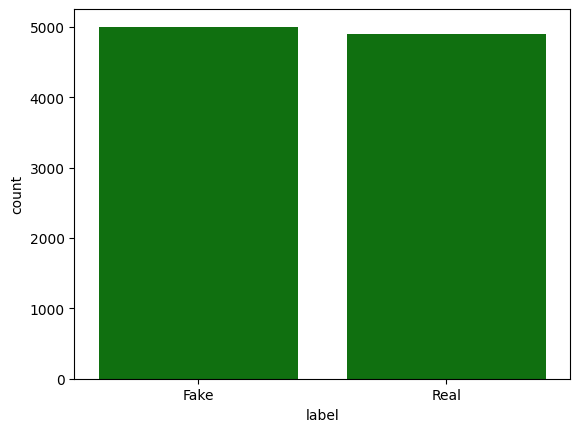

In [7]:
# Visualization of labels
import seaborn as sns
sns.countplot(data=df, x = df['label'],color= 'green')
plt.show()

In [8]:
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [9]:
df.dtypes

Text     object
label    object
dtype: object

In [10]:
## Mapping the labels 
df['label'] = df['label'].map({'Real':0,'Fake':1})

In [11]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,1
1,U.S. conservative leader optimistic of common ...,0
2,"Trump proposes U.S. tax overhaul, stirs concer...",0
3,Court Forces Ohio To Allow Millions Of Illega...,1
4,Democrats say Trump agrees to work on immigrat...,0


## Data Preprocessing

In [12]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to D:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to D:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to D:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to D:\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud

In [14]:
lemmetizer = WordNetLemmatizer()

In [15]:
## Function For Cleaning Text 
def preprocess_data(txt):
    cleantxt = re.sub(r'http\S+|www\.\S+', '',txt)  # remove links
    cleantxt = re.sub(r'@\S+','',cleantxt)          # remove mentions
    cleantxt = re.sub(r'#\S+','',cleantxt)          # remove hashtags
    cleantxt = re.sub(r'[^\w\s]','',cleantxt)       # remove white spaces
    cleantxt = re.sub('[^a-zA-Z]',' ',cleantxt)
    cleantxt = cleantxt.lower()
    words = word_tokenize(cleantxt)
    words = [lemmetizer.lemmatize(word,pos='v') for word in words if not word in stopwords.words('english')]
    cleantxt = ' '.join(words)
    return cleantxt 

In [16]:
df['Text'] = df['Text'].apply(preprocess_data)

In [17]:
df['Text'][4]

'democrats say trump agree work immigration bill wall dispute washington reuters president donald trump democratic leaders us congress agree work together legislation protect dreamers illegal immigrants children enter unite state lawmakers say wednesday although dispute erupt exactly agree follow dinner trump white house senate democratic leader chuck schumer house representatives democratic leader nancy pelosi say productive meet focus daca program establish former president barack obama agree enshrine protections daca defer action childhood arrivals law quickly work package border security exclude wall thats acceptable side schumer pelosi say statement year democrats insist block legislation contain fund wall along length us border mexico top trump campaign goal many republicans congress also support white house officials suggest legislation daca could move forward without wall fund white house spokeswoman sarah sanders dispute characterization deal reach leave legislation focus drea

## Word Cloud

In [18]:
fake_news = ' '.join(df[df['label'] == 1]['Text'])
real_news = ' '.join(df[df['label'] == 0]['Text'])

In [19]:
fake_wc = WordCloud(width=800, height=400, background_color='red', colormap='viridis').generate(fake_news)
real_wc = WordCloud(width=800, height=400, background_color='green', colormap='viridis').generate(real_news) 

In [20]:
fake_wc

In [21]:
real_wc

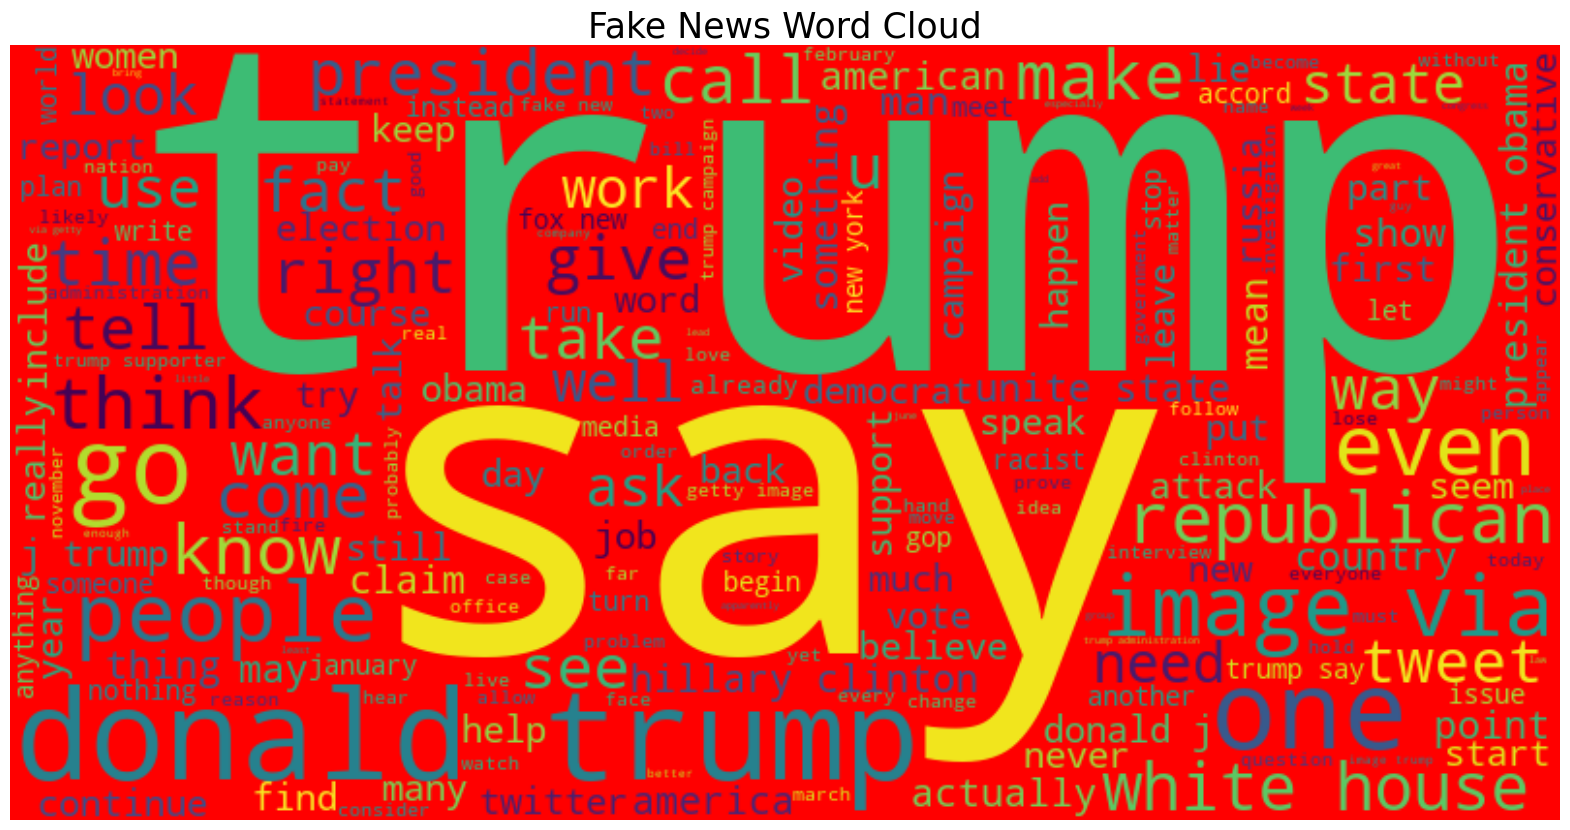

In [22]:
## Word Cloud For Fake News 
plt.figure(figsize=(20, 12))
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud', fontsize=25)
plt.show()

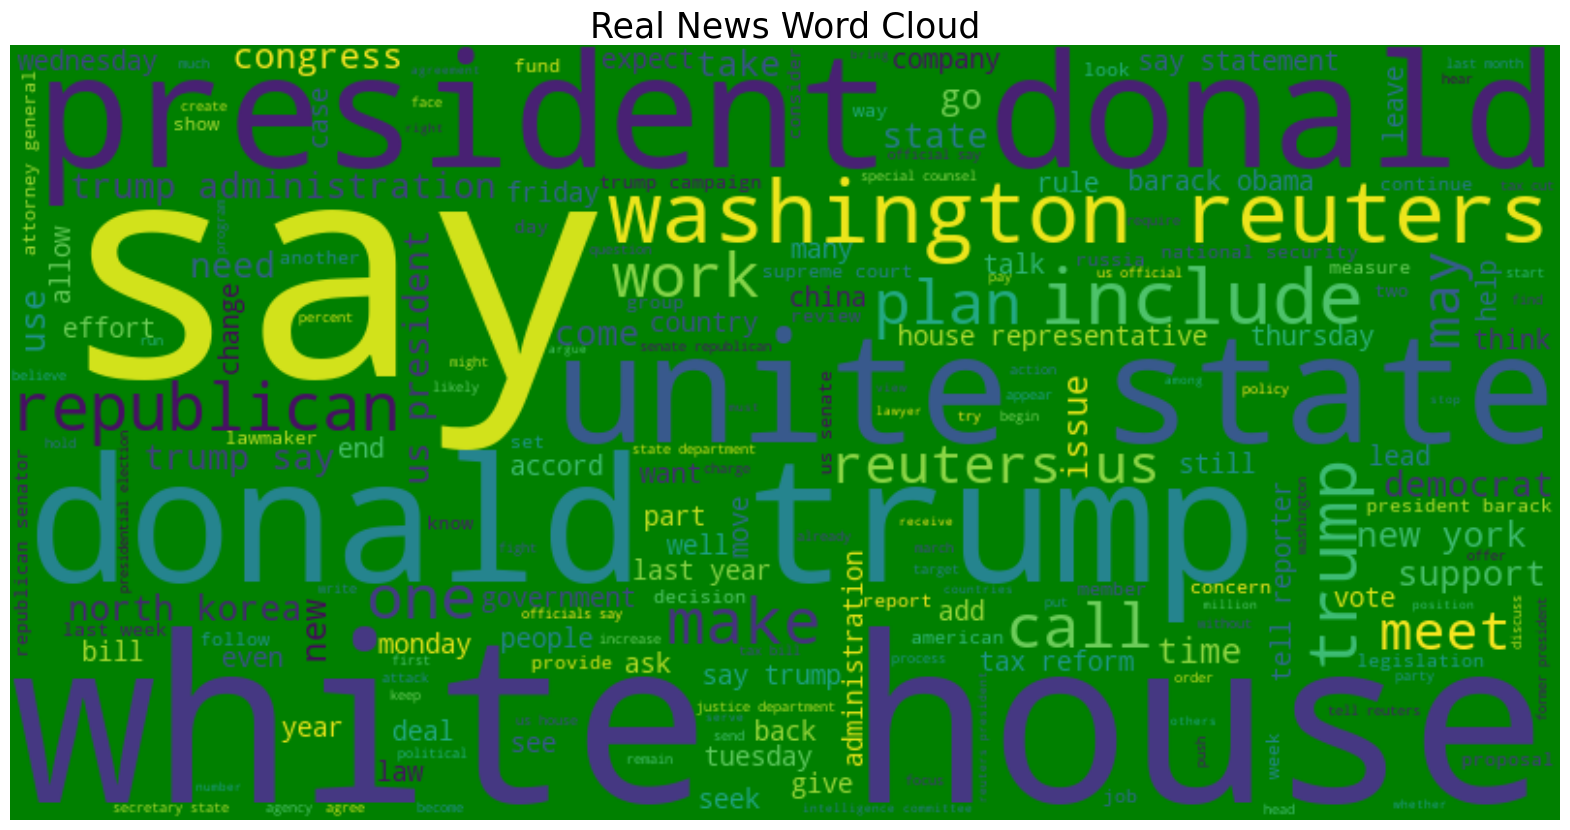

In [23]:
## Word Cloud For Real News
plt.figure(figsize=(20, 12))
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Real News Word Cloud', fontsize=25)
plt.show()

In [24]:
## Spliting The Data
from sklearn.model_selection import train_test_split

In [25]:
train,test = train_test_split(df, test_size=0.2, random_state=42)
train,val = train_test_split(train,test_size=0.1, random_state=42) 

In [26]:
train.shape,val.shape,test.shape 

((7128, 2), (792, 2), (1980, 2))

In [27]:
x_train = train['Text']
y_train = train['label']

x_test = test['Text']
y_test = test['label']

x_val = val['Text']
y_val = val['label'] 

In [28]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_val.shape,y_val.shape

((7128,), (7128,), (1980,), (1980,), (792,), (792,))

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [30]:
tokenizer = Tokenizer()

In [31]:
tokenizer.fit_on_texts(df['Text'])

In [32]:
X_Train = tokenizer.texts_to_sequences(x_train)
X_Val = tokenizer.texts_to_sequences(x_val)
X_Test = tokenizer.texts_to_sequences(x_test) 

In [33]:
len(X_Train),len(X_Val), len(X_Test)

(7128, 792, 1980)

In [34]:
X_Train_Pad = pad_sequences(X_Train,maxlen=500,padding='post')
X_Val_Pad = pad_sequences(X_Val,maxlen=500,padding='post')
X_Test_Pad = pad_sequences(X_Test,maxlen=500,padding='post')

In [35]:
len(X_Train),len(X_Val), len(X_Test)

(7128, 792, 1980)

In [36]:
## Vocabulary Size
vocab_size = len(tokenizer.word_index)+1
vocab_size

72479

## LSTM Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Embedding,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [38]:
opt = Adam(learning_rate=0.0001,clipvalue=1.0)

In [39]:
loss = BinaryCrossentropy()

In [40]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=32,input_length=500))
model_lstm.add(LSTM(64,return_sequences=True))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1,activation='sigmoid'))

d:\Fake_News_Detection(new)\even\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [41]:
model_lstm.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [42]:
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
early_stopping_lstm = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)
early_stopping_lstm

In [44]:
history = model_lstm.fit(
    X_Train_Pad, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_Val_Pad, y_val),
    callbacks=[early_stopping_lstm]
)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 56s 445ms/step - accuracy: 0.5398 - loss: 0.6920 - val_accuracy: 0.5152 - val_loss: 0.6937
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 48s 432ms/step - accuracy: 0.5489 - loss: 0.6898 - val_accuracy: 0.5164 - val_loss: 0.6905
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 43s 383ms/step - accuracy: 0.5693 - loss: 0.6721 - val_accuracy: 0.5227 - val_loss: 0.6886
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 82s 378ms/step - accuracy: 0.5802 - loss: 0.6611 - val_accuracy: 0.5732 - val_loss: 0.6573
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 43s 383ms/step - accuracy: 0.6574 - loss: 0.6063 - val_accuracy: 0.7652 - val_loss: 0.4871
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 44s 395ms/step - accuracy: 0.8264 - loss: 0.4305 - val_accuracy: 0.8258 - val_loss: 0.4225
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 44s 388ms/step - accuracy: 0.7013 - loss: 0.6036 - val_accuracy: 0.8005 - val_loss: 0.5082
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 48s 425ms/step - accuracy: 0.7936 - loss: 0

In [45]:
y_train_lstm = model_lstm.predict(X_Train_Pad)

223/223 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step


In [46]:
y_train_lstm = np.where(y_train_lstm>0.5,1,0)

In [47]:
## Training Confusion Matrix 
print("Confusion_Matrix_Train:-\n",confusion_matrix(y_train,y_train_lstm))

Confusion_Matrix_Train:-
 [[2598  886]
 [  87 3557]]


In [48]:
## Training Accuracy
print("Training_Accuracy:-",accuracy_score(y_train,y_train_lstm))

Training_Accuracy:- 0.8634960718294051


In [49]:
## Training Classification Report
print("Classification_Report_Train:-\n",classification_report(y_train,y_train_lstm))

Classification_Report_Train:-
               precision    recall  f1-score   support

           0       0.97      0.75      0.84      3484
           1       0.80      0.98      0.88      3644

    accuracy                           0.86      7128
   macro avg       0.88      0.86      0.86      7128
weighted avg       0.88      0.86      0.86      7128



In [50]:
y_test_lstm = model_lstm.predict(X_Test_Pad)

62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step


In [51]:
y_test_lstm = np.where(y_test_lstm>0.5,1,0)

In [52]:
## Testing Confusion Matrix
print("Confusion_Matrix_Test:-\n",confusion_matrix(y_test,y_test_lstm))

Confusion_Matrix_Test:-
 [[756 251]
 [ 30 943]]


In [53]:
## Testing Accuracy
print("Testing_Accuracy:-",accuracy_score(y_test,y_test_lstm))

Testing_Accuracy:- 0.8580808080808081


In [54]:
## Testing Classification Report
print("Classification_Report_Test:-\n",classification_report(y_test,y_test_lstm))

Classification_Report_Test:-
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      1007
           1       0.79      0.97      0.87       973

    accuracy                           0.86      1980
   macro avg       0.88      0.86      0.86      1980
weighted avg       0.88      0.86      0.86      1980



In [55]:
## Save the Model
model_lstm.save('lstm.h5')

## Pickle File

In [59]:
import joblib

In [ ]:
## Tokenizer Pickle File 
joblib.dump(tokenizer,'tokenizer.pkl')

['tokenizer.pkl']